**Vamos experimentar agora a Rede Neural Artificial?**
Veja:
https://scikit-learn.org/stable/modules/neural_networks_supervised.html# 

In [11]:
!pip -q install yellowbrick

In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import OneHotEncoder
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [96]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']

In [97]:
# Passo 1: Carregar os dados
df = pd.read_csv('breast-cancer.csv')

# Exibir as primeiras linhas do dataframe para entender sua estrutura
print(df.head())

     age menopause tumor-size inv-nodes node-caps  deg-malig breast  \
0  40-49   premeno      15-19       0-2       yes          3  right   
1  50-59      ge40      15-19       0-2        no          1  right   
2  50-59      ge40      35-39       0-2        no          2   left   
3  40-49   premeno      35-39       0-2       yes          3  right   
4  40-49   premeno      30-34       3-5       yes          2   left   

  breast-quad irradiat                 Class  
0     left_up       no     recurrence-events  
1     central       no  no-recurrence-events  
2    left_low       no     recurrence-events  
3    left_low      yes  no-recurrence-events  
4    right_up       no     recurrence-events  


In [98]:
df = pd.read_csv('breast-cancer.csv')
print(df.columns)
# Exibir as primeiras linhas do dataframe para entender sua estrutura
# print(df.head())

# Passo 2: Substituir '?' por NaN para tratar valores ausentes
df.replace('?', pd.NA, inplace=True)

# Passo 3: Converter variáveis categóricas em variáveis dummy
df = pd.get_dummies(df, drop_first=True)
print(df.head())

# Passo 7: Dividir os dados em conjuntos de treinamento e teste


Index(['age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'deg-malig',
       'breast', 'breast-quad', 'irradiat', 'Class'],
      dtype='object')
   deg-malig  age_30-39  age_40-49  age_50-59  age_60-69  age_70-79  \
0          3      False       True      False      False      False   
1          1      False      False       True      False      False   
2          2      False      False       True      False      False   
3          3      False       True      False      False      False   
4          2      False       True      False      False      False   

   menopause_lt40  menopause_premeno  tumor-size_10-14  tumor-size_15-19  ...  \
0           False               True             False              True  ...   
1           False              False             False              True  ...   
2           False              False             False             False  ...   
3           False               True             False             False  ...   
4           

In [99]:
# Passo 4: Separar as características (X) e a variável alvo (y)
# Substituir 'Class' pela coluna alvo real, neste caso 'Class_no-recurrence-events' e 'Class_recurrence-events'
X = df.drop(['Class_recurrence-events'],axis='columns')
y = df['Class_recurrence-events']  # Usar uma das classes como alvo binário (0 ou 1)

# Passo 5: Tratar valores ausentes (opção: preencher com a média)
X.fillna(X.mean(), inplace=True)

# Passo 6: Normalizar os dados de entrada
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [100]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Passo 8: Salvar os dados pré-processados em um arquivo .pkl
# Criar um dicionário para armazenar os dados
data = {
    'X_train': X_train,
    'X_test': X_test,
    'y_train': y_train,
    'y_test': y_test
}
# Salvar o dicionário em um arquivo .pkl
with open('dados_tratados.pkl', 'wb') as f:
    pickle.dump(data, f)

print("Dados pré-processados e salvos em 'dados_tratados.pkl'.")

Dados pré-processados e salvos em 'dados_tratados.pkl'.


In [101]:
import pickle
with open('dados_tratados.pkl', 'rb') as f:
  X_treino, X_teste, y_treino, y_teste = pickle.load(f)
print(X_train)

[[-1.42341644 -0.37947332 -0.67763093 ... -0.30265996 -0.36115756
  -0.5585039 ]
 [-0.0664261  -0.37947332 -0.67763093 ... -0.30265996 -0.36115756
  -0.5585039 ]
 [-1.42341644 -0.37947332  1.47572957 ... -0.30265996 -0.36115756
  -0.5585039 ]
 ...
 [-0.0664261  -0.37947332 -0.67763093 ... -0.30265996 -0.36115756
   1.79049779]
 [ 1.29056424 -0.37947332 -0.67763093 ... -0.30265996 -0.36115756
   1.79049779]
 [ 1.29056424 -0.37947332 -0.67763093 ... -0.30265996 -0.36115756
  -0.5585039 ]]


**Vamos treinar com a rede neural?**

**Experimente a RNA com os parâmetros default. A rede convergiu? quantas épocas?**

In [102]:
modelo = MLPClassifier()
rede_neural = MLPClassifier(max_iter=1000, verbose=True, tol=0.00001, solver = 'adam', activation = 'relu',hidden_layer_sizes = (3, 2, 1))
modelo.fit(X_train, y_train)

/home/1413715/.local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

**Depois execute novamente com os ajustes. Veja agora os erros a cada época.. estabeleça o verbose para true **

In [103]:
modelo = MLPClassifier(max_iter=1000, verbose=True)
modelo.fit(X_train, y_train)

Iteration 1, loss = 0.71312306
Iteration 2, loss = 0.68331671
Iteration 3, loss = 0.65930913
Iteration 4, loss = 0.63807515
Iteration 5, loss = 0.61862114
Iteration 6, loss = 0.60291359
Iteration 7, loss = 0.58833631
Iteration 8, loss = 0.57592624
Iteration 9, loss = 0.56554810
Iteration 10, loss = 0.55588186
Iteration 11, loss = 0.54829135
Iteration 12, loss = 0.54043077
Iteration 13, loss = 0.53484916
Iteration 14, loss = 0.52962057
Iteration 15, loss = 0.52457578
Iteration 16, loss = 0.51982363
Iteration 17, loss = 0.51590981
Iteration 18, loss = 0.51186823
Iteration 19, loss = 0.50808431
Iteration 20, loss = 0.50457563
Iteration 21, loss = 0.50110745
Iteration 22, loss = 0.49744120
Iteration 23, loss = 0.49432200
Iteration 24, loss = 0.49094329
Iteration 25, loss = 0.48783947
Iteration 26, loss = 0.48484466
Iteration 27, loss = 0.48163580
Iteration 28, loss = 0.47871597
Iteration 29, loss = 0.47603404
Iteration 30, loss = 0.47319498
Iteration 31, loss = 0.47044510
Iteration 32, los

MLPClassifier(max_iter=1000, verbose=True)

**Faça outras alterações nos parâmetros**

**4 entradas - 3 neurônios - 3 neurônios - 1**

**Veja SoftMax para problemas multiclasse**

In [104]:
rede_neural = MLPClassifier(max_iter=1000, verbose=True, tol=0.00000000000001, solver = 'adam', activation = 'relu', hidden_layer_sizes = 9)
modelo.fit(X_train, y_train)

Iteration 1, loss = 0.66088495
Iteration 2, loss = 0.63795421
Iteration 3, loss = 0.61976466
Iteration 4, loss = 0.60426102
Iteration 5, loss = 0.59100212
Iteration 6, loss = 0.57928734
Iteration 7, loss = 0.56905312
Iteration 8, loss = 0.56001414
Iteration 9, loss = 0.55173612
Iteration 10, loss = 0.54413894
Iteration 11, loss = 0.53757226
Iteration 12, loss = 0.53182163
Iteration 13, loss = 0.52626557
Iteration 14, loss = 0.52100007
Iteration 15, loss = 0.51613355
Iteration 16, loss = 0.51145459
Iteration 17, loss = 0.50753928
Iteration 18, loss = 0.50308324
Iteration 19, loss = 0.49878943
Iteration 20, loss = 0.49507514
Iteration 21, loss = 0.49121771
Iteration 22, loss = 0.48746764
Iteration 23, loss = 0.48387588
Iteration 24, loss = 0.48066442
Iteration 25, loss = 0.47758223
Iteration 26, loss = 0.47477993
Iteration 27, loss = 0.47205699
Iteration 28, loss = 0.46937316
Iteration 29, loss = 0.46689183
Iteration 30, loss = 0.46443279
Iteration 31, loss = 0.46201114
Iteration 32, los

MLPClassifier(max_iter=1000, verbose=True)



> **Vamos testar o modelo?**



In [105]:
previsoes = modelo.predict(X_test)

In [106]:
previsoes

array([False,  True, False,  True, False, False, False,  True,  True,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False,  True, False, False,  True,
       False, False, False, False,  True, False, False, False, False,
       False, False, False,  True,  True, False, False,  True, False,
       False, False, False, False,  True, False,  True,  True, False,
       False, False,  True,  True])



> **Será se o modelo acertou?**



In [107]:
y_test

9      False
267     True
143    False
212    False
227    False
155    False
283    False
73      True
196     True
33     False
185    False
124    False
146     True
265    False
5      False
220    False
233    False
251    False
45      True
268    False
170     True
56     False
200    False
79     False
111    False
275    False
274    False
217    False
109    False
42     False
203    False
84     False
269    False
93     False
46     False
204    False
63      True
75     False
240     True
164     True
181     True
30      True
22     False
24      True
175    False
77     False
147    False
221    False
249    False
92      True
207     True
234    False
177     True
211     True
6      False
116     True
193    False
60      True
Name: Class_recurrence-events, dtype: bool

In [108]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_test,previsoes)

0.7241379310344828

In [109]:
from yellowbrick.classifier import ConfusionMatrix
confusion_matrix(y_test, previsoes)

array([[33,  7],
       [ 9,  9]])

0.7241379310344828

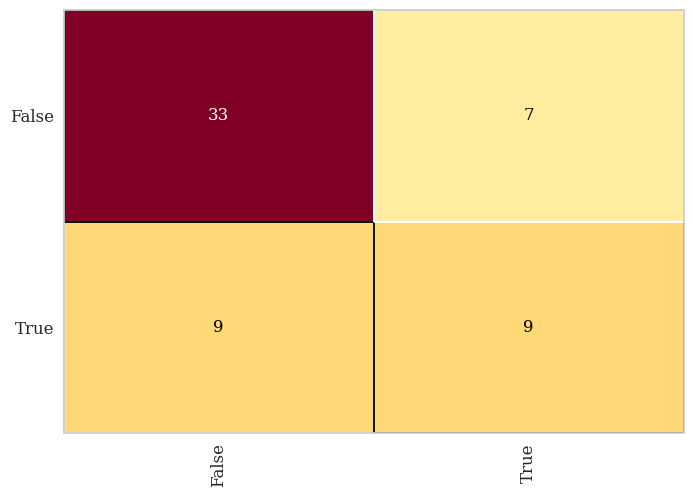

In [110]:
cm = ConfusionMatrix(modelo)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [112]:
print(classification_report(y_test, previsoes))

              precision    recall  f1-score   support

       False       0.79      0.82      0.80        40
        True       0.56      0.50      0.53        18

    accuracy                           0.72        58
   macro avg       0.67      0.66      0.67        58
weighted avg       0.72      0.72      0.72        58

